In [1]:
from os.path import join
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.manifold import TSNE
import pickle
# from Bio.Cluster import kcluster
import os
import numpy as np
import yaml
import os
import pandas
from collections import Counter
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sys
import seaborn as sns
# import pyclustering
import matplotlib.pylab as plt
import matplotlib
import seaborn as sb
from shutil import copyfile
import matplotlib as plt
# ------- SERVER EXTENSIONS ---------
lib =  r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/utilities/droplet_dataset'
lib2 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/utilities'
lib3 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/data_analysis'
lib4 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy'
lib5 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/scripts'
import sys
sys.path.append(lib)
sys.path.append(lib2)
sys.path.append(lib3)
sys.path.append(lib4)
sys.path.append(lib5)
# ------- SERVER EXTENSIONS ---------
from utilities.general_helpers import create_folder


In [11]:
# OUTPUT_PATH = r'/storage/md_keren/shitay/outputs/clustering/heatmap/29.5.21'
FILTERED_CELLS_PATH = r'/storage/md_keren/shitay/Data/droplet_seq/cohort/normalized/5.21/cohort_normalized_24.5.21.pkl'
KMEANS_ROW_CLUSTERS_PATH = r'/storage/md_keren/shitay/outputs/clustering/kmeans/24.5.21/row_kmeans'
KMEANS_FILE_NAME = r'kmeans_immune_cells_4k_genes'  # excluding the suffix: '_k_num.pkl'
CLUSTERING_ANALYSIS_PATH = fr'/storage/md_keren/shitay/outputs/clustering/markers/29.5.21/'


In [3]:
plt.rcParams['figure.dpi'] = 1000
filtered_cells = pickle.load(open(FILTERED_CELLS_PATH, 'rb'))
filtered_cells = filtered_cells.filter_cells_by_property('is_immune', True)
cmap = pickle.load(open(r'/storage/md_keren/shitay/outputs/clustering/heatmap/colorbar.pkl', 'rb'))
NUM_OF_MARKER_GENES = 30


In [38]:
K = 6
print(f"Current K = {K}")

kmeans_file_path = join(KMEANS_ROW_CLUSTERS_PATH, KMEANS_FILE_NAME + f'_k_{K}.pkl')
print(f'Loading kmeans file:\n{kmeans_file_path}')
clusters_indices = pickle.load(open(kmeans_file_path, 'rb'))['clusters']
# markers



features = filtered_cells.features

# print(clustering_analysis[0].keys())
gene_indices = []
gene_horiz_lines = [0]  # for heatmap
cell_vertical_lines = [0]  # for heatmap
top_gene_markers = {}

print('num markers for each cluster: ', NUM_OF_MARKER_GENES)
# print('num markers for all clusters: ', NUM_OF_MARKER_GENES * len(clustering_analysis))
# print('num clusters: ', len(clustering_analysis))

Current K = 6
Loading kmeans file:
/storage/md_keren/shitay/outputs/clustering/kmeans/24.5.21/row_kmeans/kmeans_immune_cells_4k_genes_k_6.pkl
num markers for each cluster:  30


In [40]:
for cluster_idx in range(1, K+1):
    print(f'cluster idx {cluster_idx}')
    cluster = pd.read_csv(join(CLUSTERING_ANALYSIS_PATH, f'markers_cluster_{K}', f'markers_cluster_{cluster_idx}.csv'))
    

    #region
    cluster = cluster.sort_values(by=['log_FC'], ascending=False)
    gene_ids = cluster['features'].tolist()
    top_gene_markers[cluster_idx] = cluster['gene names'][:5]
    gene_indices += [features.index(ii) for ii in gene_ids[:NUM_OF_MARKER_GENES]]
    gene_horiz_lines += [gene_horiz_lines[-1] + len(gene_ids[:NUM_OF_MARKER_GENES])]
    #endregion

   
print('Num of repetition in markers:', NUM_OF_MARKER_GENES * K - len(set(gene_indices)), end="\n\n")

cluster idx 1
cluster idx 2
cluster idx 3
cluster idx 4
cluster idx 5
cluster idx 6
Num of repetition in markers: 32



In [43]:
cells_indices = []
for cls_idx, cluster_indices in enumerate(clusters_indices):
    cells_indices += cluster_indices
    print(f'{cls_idx}. num cells: {len(cluster_indices)}')
    cell_vertical_lines += [cell_vertical_lines[-1] + len(cluster_indices)]

arr_heatmap = filtered_cells.counts[cells_indices][:, gene_indices]
heatmap = np.zeros_like(arr_heatmap)
heatmap[arr_heatmap > 1] = 1

## 19.3.21 using zscore
arr_heatmap = scipy.stats.zscore(arr_heatmap, axis=0, ddof=1)




0. num cells: 13027
1. num cells: 20709
2. num cells: 10067
3. num cells: 5356
4. num cells: 12885
5. num cells: 21617


Text(962.2222222222223, 0.5, 'Markers')

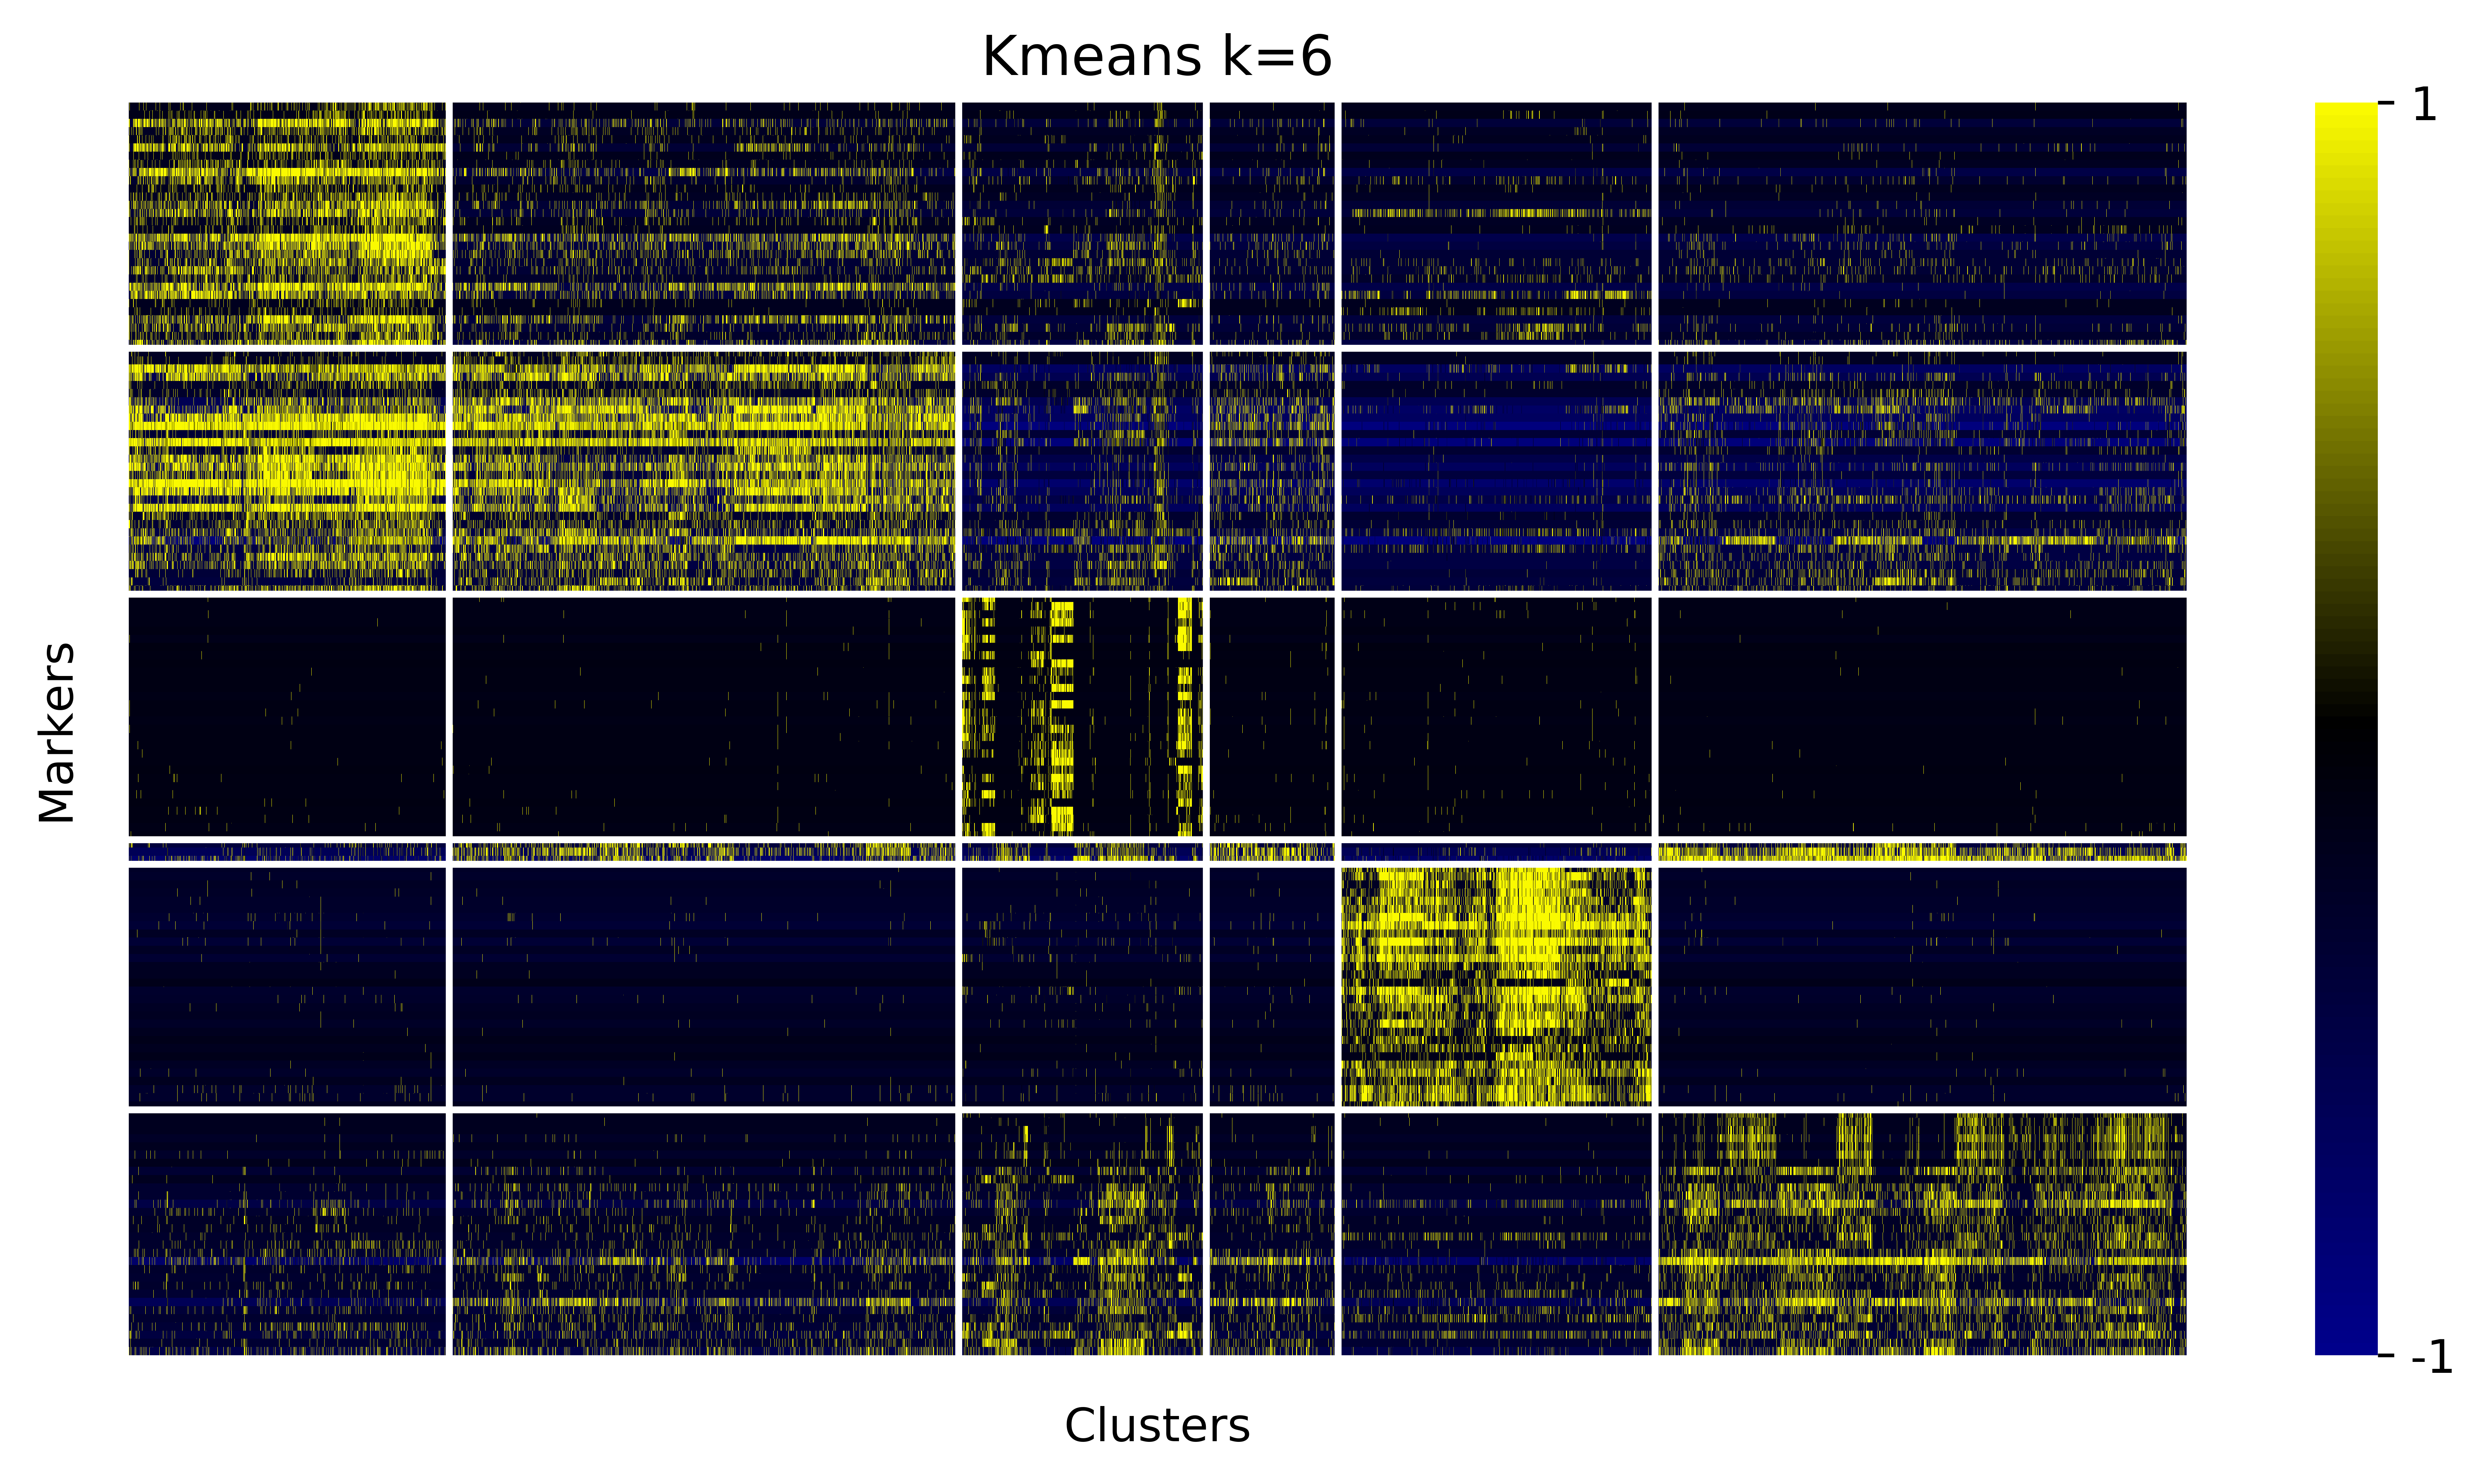

In [44]:

fig, ax = plt.pyplot.subplots(1)
fig.set_size_inches(10, 5)


sb_out = sb.heatmap(arr_heatmap.T, vmin=-1, vmax=1, cmap=cmap)
cbar = sb_out.collections[0].colorbar
cbar.set_ticks([-1, 1])
cbar.set_ticklabels([-1, 1])
sb_out.set(xticklabels=[])
sb_out.set(yticklabels=[])
sb_out.tick_params(bottom=False, left=False)
for hor_line in gene_horiz_lines[1:-1]:
    ax.axhline(hor_line, color='white')

for ver_line in cell_vertical_lines[1:-1]:
    ax.axvline(ver_line, color='white')

ax.set_title(f"Kmeans k={K}")
ax.set_xlabel('Clusters')
ax.set_ylabel('Markers')

##### save second heatmap
# fig.savefig(join(OUTPUT_PATH, f'density_heatmap_{K}.png'))

